# Introduction

Air travel has become an integral part of modern society, with airports serving as crucial hubs for transportation and connectivity. Understanding the dynamics and patterns within air passenger traffic is vital for optimizing airport operations, predicting demand, and fostering efficient resource allocation.

This project delves into the wealth of information provided by the San Francisco International Airport's Monthly Passenger Traffic Statistics by Airline. Leveraging unsupervised learning techniques, specifically K-means clustering, this analysis aims to uncover inherent structures and segments within the passenger data.

This project's ultimate goal is to extract meaningful patterns from the complex air passenger data, providing actionable insights that could drive informed decision-making within the aviation industry.

**Dataset Source:** https://data.world/data-society/air-traffic-passenger-data

# 1. Data Preprocessing

In [1]:
import pandas as pd

In [2]:
air_data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
air_data.head()

Activity Period Operating Airline Operating Airline IATA Code  \
0           200507      ATA Airlines                          TZ   
1           200507      ATA Airlines                          TZ   
2           200507      ATA Airlines                          TZ   
3           200507       Air Canada                           AC   
4           200507       Air Canada                           AC   

  Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0      ATA Airlines                          TZ       Domestic         US   
1      ATA Airlines                          TZ       Domestic         US   
2      ATA Airlines                          TZ       Domestic         US   
3       Air Canada                           AC  International     Canada   
4       Air Canada                           AC  International     Canada   

  Activity Type Code Price Category Code    Terminal Boarding Area  \
0           Deplaned            Low Fare  Terminal 1             B   
1           Enplaned            Low Fare  Terminal 1             B   
2     Thru / Transit            Low Fare  Terminal 1             B   
3           Deplaned               Other  Terminal 1             B   
4           Enplaned               Other  Terminal 1             B   

   Passenger Count Adjusted Activity Type Code  Adjusted Passenger Count  \
0            27271                    Deplaned                     27271   
1            29131                    Enplaned                     29131   
2             5415          Thru / Transit * 2                     10830   
3            35156                    Deplaned                     35156   
4            34090                    Enplaned                     34090   

   Year Month  
0  2005  July  
1  2005  July  
2  2005  July  
3  2005  July  
4  2005  July

In [3]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

Based on the above information, we see the following:

#### Numerical Columns:

- Activity Period
- Passenger Count
- Adjusted Passenger Count
- Year

#### Categorical Columns:

- Operating Airline
- Operating Airline IATA Code
- Published Airline
- Published Airline IATA Code
- GEO Summary
- GEO Region
- Activity Type Code
- Price Category Code
- Terminal
- Boarding Area
- Adjusted Activity Type Code
- Month

In [4]:
air_data.describe()

Activity Period  Passenger Count  Adjusted Passenger Count  \
count     15007.000000     15007.000000              15007.000000   
mean     201045.073366     29240.521090              29331.917105   
std         313.336196     58319.509284              58284.182219   
min      200507.000000         1.000000                  1.000000   
25%      200803.000000      5373.500000               5495.500000   
50%      201011.000000      9210.000000               9354.000000   
75%      201308.000000     21158.500000              21182.000000   
max      201603.000000    659837.000000             659837.000000   

               Year  
count  15007.000000  
mean    2010.385220  
std        3.137589  
min     2005.000000  
25%     2008.000000  
50%     2010.000000  
75%     2013.000000  
max     2016.000000

Here's a breakdown on the statistiacal summary above:

#### Activity Period:

The Activity Period column represents time intervals, likely indicating months or periods within a year. The dataset spans from 2005 to 2016, with an average activity period around 2010. I'll extract the month from this column.

#### Passenger Count and Adjusted Passenger Count:

Both 'Passenger Count' and 'Adjusted Passenger Count' columns indicate the number of passengers. On average, there were around 29,240 passengers per activity period, with a considerable standard deviation of approximately 58,319. The passenger counts range from a minimum of 1 to a maximum of 659,837, showcasing significant variability in passenger traffic across these periods.

#### Year

The Year column confirms the temporal aspect of the dataset, ranging from 2005 to 2016. I'll convert this to datetime format as well

In [5]:
# Converting the 'Activity Period' column to `datetime` and assigning it to 'Date' column
# I'll drop the 'Activity Period' column

air_data['Date'] = pd.to_datetime(air_data['Activity Period'], format = '%Y%m')
air_data.drop('Activity Period', axis = 1, inplace = True)

In [6]:
air_data.head()

Operating Airline Operating Airline IATA Code Published Airline  \
0      ATA Airlines                          TZ      ATA Airlines   
1      ATA Airlines                          TZ      ATA Airlines   
2      ATA Airlines                          TZ      ATA Airlines   
3       Air Canada                           AC       Air Canada    
4       Air Canada                           AC       Air Canada    

  Published Airline IATA Code    GEO Summary GEO Region Activity Type Code  \
0                          TZ       Domestic         US           Deplaned   
1                          TZ       Domestic         US           Enplaned   
2                          TZ       Domestic         US     Thru / Transit   
3                          AC  International     Canada           Deplaned   
4                          AC  International     Canada           Enplaned   

  Price Category Code    Terminal Boarding Area  Passenger Count  \
0            Low Fare  Terminal 1             B            27271   
1            Low Fare  Terminal 1             B            29131   
2            Low Fare  Terminal 1             B             5415   
3               Other  Terminal 1             B            35156   
4               Other  Terminal 1             B            34090   

  Adjusted Activity Type Code  Adjusted Passenger Count  Year Month       Date  
0                    Deplaned                     27271  2005  July 2005-07-01  
1                    Enplaned                     29131  2005  July 2005-07-01  
2          Thru / Transit * 2                     10830  2005  July 2005-07-01  
3                    Deplaned                     35156  2005  July 2005-07-01  
4                    Enplaned                     34090  2005  July 2005-07-01

In [7]:
# Drop 'Year' and 'Month' columns
air_data.drop(['Year', 'Month'], axis = 1, inplace = True) 

In [8]:
air_data.head()

Operating Airline Operating Airline IATA Code Published Airline  \
0      ATA Airlines                          TZ      ATA Airlines   
1      ATA Airlines                          TZ      ATA Airlines   
2      ATA Airlines                          TZ      ATA Airlines   
3       Air Canada                           AC       Air Canada    
4       Air Canada                           AC       Air Canada    

  Published Airline IATA Code    GEO Summary GEO Region Activity Type Code  \
0                          TZ       Domestic         US           Deplaned   
1                          TZ       Domestic         US           Enplaned   
2                          TZ       Domestic         US     Thru / Transit   
3                          AC  International     Canada           Deplaned   
4                          AC  International     Canada           Enplaned   

  Price Category Code    Terminal Boarding Area  Passenger Count  \
0            Low Fare  Terminal 1             B            27271   
1            Low Fare  Terminal 1             B            29131   
2            Low Fare  Terminal 1             B             5415   
3               Other  Terminal 1             B            35156   
4               Other  Terminal 1             B            34090   

  Adjusted Activity Type Code  Adjusted Passenger Count       Date  
0                    Deplaned                     27271 2005-07-01  
1                    Enplaned                     29131 2005-07-01  
2          Thru / Transit * 2                     10830 2005-07-01  
3                    Deplaned                     35156 2005-07-01  
4                    Enplaned                     34090 2005-07-01

## 1.1 Checking for missing values

In [9]:
missing_values = air_data.isnull().sum()
print(missing_values)

Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Date                            0
dtype: int64


In [10]:
air_data[air_data['Operating Airline IATA Code'].isnull() & air_data['Published Airline IATA Code'].isnull()]

Operating Airline Operating Airline IATA Code Published Airline  \
148      Boeing Company                         NaN    Boeing Company   
6814          Servisair                         NaN         Servisair   
6815          Servisair                         NaN         Servisair   
6925   Pacific Aviation                         NaN  Pacific Aviation   
6926   Pacific Aviation                         NaN  Pacific Aviation   
7173          Servisair                         NaN         Servisair   
7174          Servisair                         NaN         Servisair   
7747          Servisair                         NaN         Servisair   
7748          Servisair                         NaN         Servisair   
7972          Servisair                         NaN         Servisair   
7973          Servisair                         NaN         Servisair   
8327          Servisair                         NaN         Servisair   
8328          Servisair                         NaN         Servisair   
8444          Servisair                         NaN         Servisair   
8445          Servisair                         NaN         Servisair   
8562          Servisair                         NaN         Servisair   
8563          Servisair                         NaN         Servisair   
8680          Servisair                         NaN         Servisair   
8793          Servisair                         NaN         Servisair   
8794          Servisair                         NaN         Servisair   
8795          Servisair                         NaN         Servisair   
8796          Servisair                         NaN         Servisair   
9131          Servisair                         NaN         Servisair   
9132          Servisair                         NaN         Servisair   
9357          Servisair                         NaN         Servisair   
9358          Servisair                         NaN         Servisair   
9468          Servisair                         NaN         Servisair   
9485      Swissport USA                         NaN     Swissport USA   
9486      Swissport USA                         NaN     Swissport USA   
9487      Swissport USA                         NaN     Swissport USA   
9698          Servisair                         NaN         Servisair   
9699          Servisair                         NaN         Servisair   
9936          Servisair                         NaN         Servisair   
9937          Servisair                         NaN         Servisair   
10172         Servisair                         NaN         Servisair   
10173         Servisair                         NaN         Servisair   
10402         Servisair                         NaN         Servisair   
10403         Servisair                         NaN         Servisair   
10841         Servisair                         NaN         Servisair   
10842         Servisair                         NaN         Servisair   
10863     Swissport USA                         NaN     Swissport USA   
10864     Swissport USA                         NaN     Swissport USA   
10979     Swissport USA                         NaN     Swissport USA   
10980     Swissport USA                         NaN     Swissport USA   
11210     Swissport USA                         NaN     Swissport USA   
11211     Swissport USA                         NaN     Swissport USA   
11538         Servisair                         NaN         Servisair   
11539         Servisair                         NaN         Servisair   
11783     Swissport USA                         NaN     Swissport USA   
11784     Swissport USA                         NaN     Swissport USA   
12011     Swissport USA                         NaN     Swissport USA   
12125     Swissport USA                         NaN     Swissport USA   
13025     Swissport USA                         NaN     Swissport USA   
13026     Swissport USA                         NaN     Swisspor

The missing values in 'Operating Airline IATA Code' correspond to missing values in 'Published Airline IATA Code', it suggests a consistent pattern in the data. This pattern might indicate an underlying reason why these values are missing together.

Here are a few potential reasons for the simultaneous absence of values in both columns:

1. **Data Collection Issue:** It could be a data collection problem where the IATA codes were not recorded or were unavailable for certain airlines during specific periods.

2. **Missingness by Design:** Some airlines or flights might not possess IATA codes due to their operational or categorization differences, leading to missing values for both 'Operating Airline IATA Code' and 'Published Airline IATA Code'.

3. **Systematic Error:** An error during data entry or extraction could result in the simultaneous absence of IATA codes for specific records.

### Dropping rows with Missing IATA Codes

In [11]:
air_data.dropna(subset = ['Operating Airline IATA Code', 'Published Airline IATA Code'], inplace = True)

In [12]:
air_data.isnull().sum()

Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Date                           0
dtype: int64

### Reasons for Dropping Rows with Missing IATA Codes

1. **Preserving Data Integrity:** The absence of IATA codes for both 'Operating Airline' and 'Published Airline' uniformly across specific records signifies a lack of critical identification information. This missing data can potentially compromise the integrity and completeness of the dataset.
<br>
2. **Avoiding Assumptions:** Attempting to impute or fill in missing IATA codes without substantial context or reliable references might introduce assumptions that could skew subsequent analysis. Preserving the original dataset without imputation ensures analysis based on accurate, observed data.
<br>
3. **Ensuring Analytical Reliability:** Clustering algorithms require consistent and complete data for effective pattern recognition and segmentation. Removing rows with missing IATA codes ensures the reliability and accuracy of the clustering analysis by working with complete and well-defined data points.
<br>

4. **Minimal Impact on Dataset Size:** Given the relatively small number of records with missing IATA codes compared to the dataset size, the removal of these records minimally affects the overall dataset, preserving the majority of the dataset for meaningful analysis.

## 1.2 Outlier Detection

In [13]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14953 entries, 0 to 15006
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Operating Airline            14953 non-null  object        
 1   Operating Airline IATA Code  14953 non-null  object        
 2   Published Airline            14953 non-null  object        
 3   Published Airline IATA Code  14953 non-null  object        
 4   GEO Summary                  14953 non-null  object        
 5   GEO Region                   14953 non-null  object        
 6   Activity Type Code           14953 non-null  object        
 7   Price Category Code          14953 non-null  object        
 8   Terminal                     14953 non-null  object        
 9   Boarding Area                14953 non-null  object        
 10  Passenger Count              14953 non-null  int64         
 11  Adjusted Activity Type Code  14953 non-null  o

In [14]:
import numpy as np

numerical_columns = ['Passenger Count', 'Adjusted Passenger Count']

# Loop through numerical columns to detect outliers
for column in numerical_columns:
    Q1 = air_data[column].quantile(0.25)
    Q3 = air_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = air_data[(air_data[column] < lower_bound) | (air_data[column] > upper_bound)]
    print(f"Outliers in {column}: {outliers.shape[0]}")

Outliers in Passenger Count: 2426
Outliers in Adjusted Passenger Count: 2428


#### Potential Reasons for Numerous Outliers:

1. **Varied Distribution:** The distribution of the 'Passenger Count' and 'Adjusted Passenger Count' columns might be highly skewed or contain extreme values, leading to a higher count of outliers.

2. **Data Characteristics:** If the dataset covers a diverse range of flights, airlines, or travel scenarios, extreme values in passenger counts might be legitimate and represent special cases.

3. **Data Quality Issues:** Outliers might also result from errors in data entry or extraction, leading to unusually high or low values that deviate significantly from the typical range.

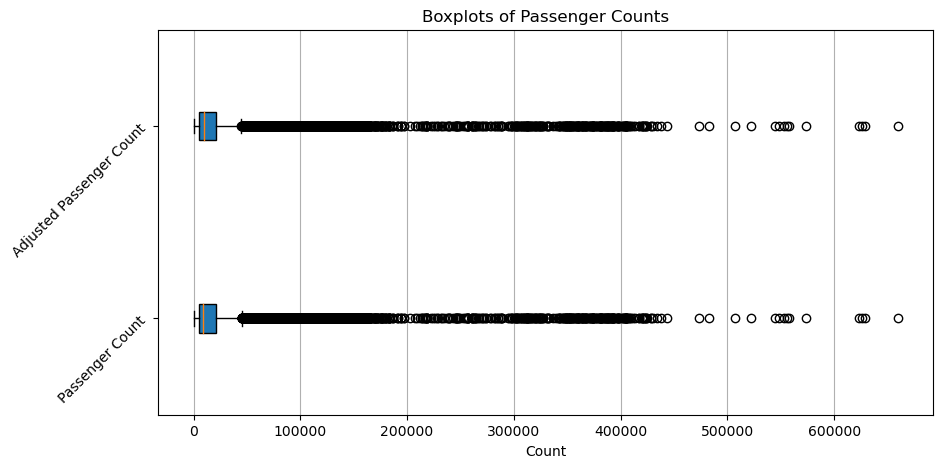

In [15]:
import matplotlib.pyplot as plt

numerical_columns = ['Passenger Count', 'Adjusted Passenger Count']

plt.figure(figsize=(10, 5))

plt.boxplot(air_data[numerical_columns].values, vert = False, patch_artist = True)
plt.title('Boxplots of Passenger Counts')
plt.xlabel('Count')
plt.yticks([1, 2], numerical_columns, rotation = 45)  # Set y-axis labels
plt.grid(axis='x')
plt.show()

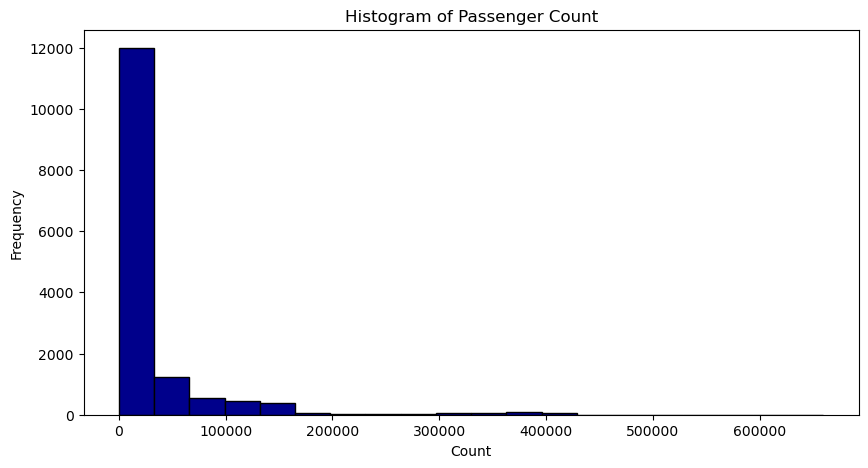

In [16]:
# Histograms
plt.figure(figsize = (10,5))
plt.hist(air_data['Passenger Count'], bins = 20, color = 'darkblue', edgecolor = 'black')
plt.title(f'Histogram of Passenger Count')
plt.xlabel('Count')
plt.ylabel('Frequency');

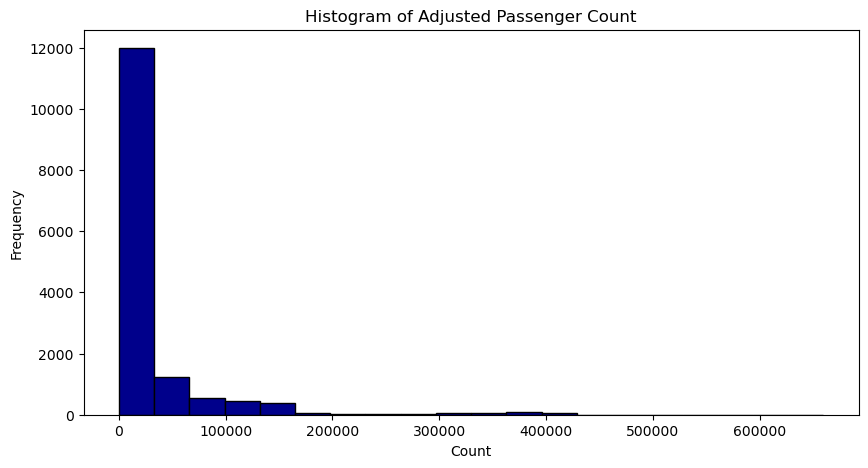

In [17]:
# Histograms
plt.figure(figsize = (10,5))
plt.hist(air_data['Adjusted Passenger Count'], bins = 20, color = 'darkblue', edgecolor = 'black')
plt.title(f'Histogram of Adjusted Passenger Count')
plt.xlabel('Count')
plt.ylabel('Frequency');

Both histograms appear identical, it could suggest that the distributions of the 'Passenger Count' and 'Adjusted Passenger Count' columns are very similar or almost identical.

Let's examine the statistical properties of these columns using methods like describe() to check their summary statistics.

In [18]:
numerical_columns = ['Passenger Count', 'Adjusted Passenger Count']

air_data[numerical_columns].describe()

Passenger Count  Adjusted Passenger Count
count     14953.000000              14953.000000
mean      29345.619006              29437.338862
std       58398.448380              58362.879319
min           1.000000                  1.000000
25%        5409.000000               5523.000000
50%        9260.000000               9418.000000
75%       21222.000000              21267.000000
max      659837.000000             659837.000000

The summary statistics indicate that both the 'Passenger Count' and 'Adjusted Passenger Count' columns have nearly identical statistical properties. The mean, standard deviation, quartiles, and even the minimum and maximum values are very similar between these columns.

Given their striking similarity in statistical characteristics, it strengthens the observation that the histograms of these columns look alike. This similarity raises the question of whether both columns offer distinct information for the analysis or if they essentially represent the same data under different labels.

In [19]:
unequal_counts = air_data[air_data['Passenger Count'] != air_data['Adjusted Passenger Count']]

In [20]:
unequal_counts

Operating Airline Operating Airline IATA Code  \
2                          ATA Airlines                          TZ   
15                      Alaska Airlines                          AS   
20                      Alaska Airlines                          AS   
95     United Airlines - Pre 07/01/2013                          UA   
98     United Airlines - Pre 07/01/2013                          UA   
...                                 ...                         ...   
14860                   United Airlines                          UA   
14965                Southwest Airlines                          WN   
14978                   United Airlines                          UA   
14981                   United Airlines                          UA   
14984                   United Airlines                          UA   

                      Published Airline Published Airline IATA Code  \
2                          ATA Airlines                          TZ   
15                      Alaska Airlines                          AS   
20                      Alaska Airlines                          AS   
95     United Airlines - Pre 07/01/2013                          UA   
98     United Airlines - Pre 07/01/2013                          UA   
...                                 ...                         ...   
14860                   United Airlines                          UA   
14965                Southwest Airlines                          WN   
14978                   United Airlines                          UA   
14981                   United Airlines                          UA   
14984                   United Airlines                          UA   

         GEO Summary GEO Region Activity Type Code Price Category Code  \
2           Domestic         US     Thru / Transit            Low Fare   
15          Domestic         US     Thru / Transit               Other   
20     International     Mexico     Thru / Transit               Other   
95          Domestic         US     Thru / Transit               Other   
98     International       Asia     Thru / Transit               Other   
...              ...        ...                ...                 ...   
14860       Domestic         US     Thru / Transit               Other   
14965       Domestic         US     Thru / Transit            Low Fare   
14978       Domestic         US     Thru / Transit               Other   
14981       Domestic         US     Thru / Transit               Other   
14984       Domestic         US     Thru / Transit               Other   

            Terminal Boarding Area  Passenger Count  \
2         Terminal 1             B             5415   
15     International             A             3678   
20     International             A             2266   
95        Terminal 3             F            11388   
98     International             G             3953   
...              ...           ...              ...   
14860     Terminal 3             F               16   
14965     Terminal 1             B               29   
14978  International             G              169   
14981     Terminal 3             E              114   
14984     Terminal 3             F               39   

      Adjusted Activity Type Code  Adjusted Passenger Count       Date  
2              Thru / Transit * 2                     10830 2005-07-01  
15             Thru / Transit * 2                      7356 2005-07-01  
20             Thru / Transit * 2                      4532 2005-07-01  
95             Thru / Transit * 2                     22776 2005-07-01  
98             Thru / Transit * 2                      7906 2005-07-01  
...                           ...                       ...        ...  
14860          Thru / Transit * 2                        32 2016-02-01  
14965          Thru / Transit * 2                        58 2016-03-01  
14978          Thru / Transit * 2                       338 2016-03-01  
14981          Thru / Transit * 2   

There are 919 rows where adjustments were made to the original 'Passenger Count' resulting in differences between 'Passenger Count' and 'Adjusted Passenger Count'.

For this analysis, I'll drop the original 'Passenger Count' column and keep the 'Adjusted Passenger Count' column.

In [21]:
air_data.drop('Passenger Count', axis = 1, inplace = True)

### Reasons for Dropping 'Passenger Count' in Favor of 'Adjusted Passenger Count'

1. **Refined Data Integrity:** 'Adjusted Passenger Count' reflects data that has undergone modifications or corrections, potentially enhancing the accuracy and reliability of the passenger counts. Retaining this adjusted and refined data ensures a higher level of data integrity, reducing the influence of potential errors or inconsistencies present in the original 'Passenger Count'.
<br>
2. **Improved Relevance:** The adjustments made in 'Adjusted Passenger Count' likely align more closely with the specific analytical goals or criteria sought in the clustering analysis. This column might encompass normalized, standardized, or corrected values, providing a more contextually relevant representation of passenger counts for the intended analysis.
<br>

3. **Focused Information:** Dropping the original 'Passenger Count' reduces redundancy within the dataset, focusing on a single representation of passenger counts. This streamlining simplifies the dataset structure and removes potential duplicative information, promoting clarity and coherence in the dataset.

## 1.3 Outlier Capping

In [22]:
air_data['Adjusted Passenger Count'].describe()

count     14953.000000
mean      29437.338862
std       58362.879319
min           1.000000
25%        5523.000000
50%        9418.000000
75%       21267.000000
max      659837.000000
Name: Adjusted Passenger Count, dtype: float64

We'll use the above information to cap the outliers in this column

In [23]:
# Calculating the IQR (Interquartile Range)
Q3 = 21267  # 75th percentile
Q1 = 5523  # 25th percentile
IQR = Q3 - Q1

# Setting the threshold for capping outliers (1.5 times IQR beyond Q3)
threshold = Q3 + 1.5 * IQR
print(f"Threshold for capping outliers: {threshold}")

Threshold for capping outliers: 44883.0


In [24]:
threshold = 44883.0  # Calculated threshold for capping outliers

# Cap outliers in 'Adjusted Passenger Count' column
air_data['Adjusted Passenger Count'] = air_data['Adjusted Passenger Count'].clip(upper = threshold)

### Reasons for Replacing Original Values with Capped Outliers

1. **Simplified Dataset Structure:** The modification simplified the dataset by consolidating outlier treatment within a single column. This streamlined structure eliminates redundancy and maintains clarity by housing the capped values in the primary 'Adjusted Passenger Count' column.
<br>
2. **Enhanced Relevance for Clustering:** Capping outliers aligns the dataset more closely with the objectives of the clustering analysis. By mitigating the influence of extreme values, the modified column provides a more representative and reliable dataset for clustering algorithms.
<br>

3. **Minimized Distortion of Results:** Addressing outliers helps prevent undue distortion of clustering outcomes. The capped values ensure a fairer representation of data points within clusters, fostering more accurate centroid placement and cluster boundaries.

# 2. Exploratory Data Analysis

In [25]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14953 entries, 0 to 15006
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Operating Airline            14953 non-null  object        
 1   Operating Airline IATA Code  14953 non-null  object        
 2   Published Airline            14953 non-null  object        
 3   Published Airline IATA Code  14953 non-null  object        
 4   GEO Summary                  14953 non-null  object        
 5   GEO Region                   14953 non-null  object        
 6   Activity Type Code           14953 non-null  object        
 7   Price Category Code          14953 non-null  object        
 8   Terminal                     14953 non-null  object        
 9   Boarding Area                14953 non-null  object        
 10  Adjusted Activity Type Code  14953 non-null  object        
 11  Adjusted Passenger Count     14953 non-null  i

## 2.1 Univariate Analysis

**Categorical Variables**

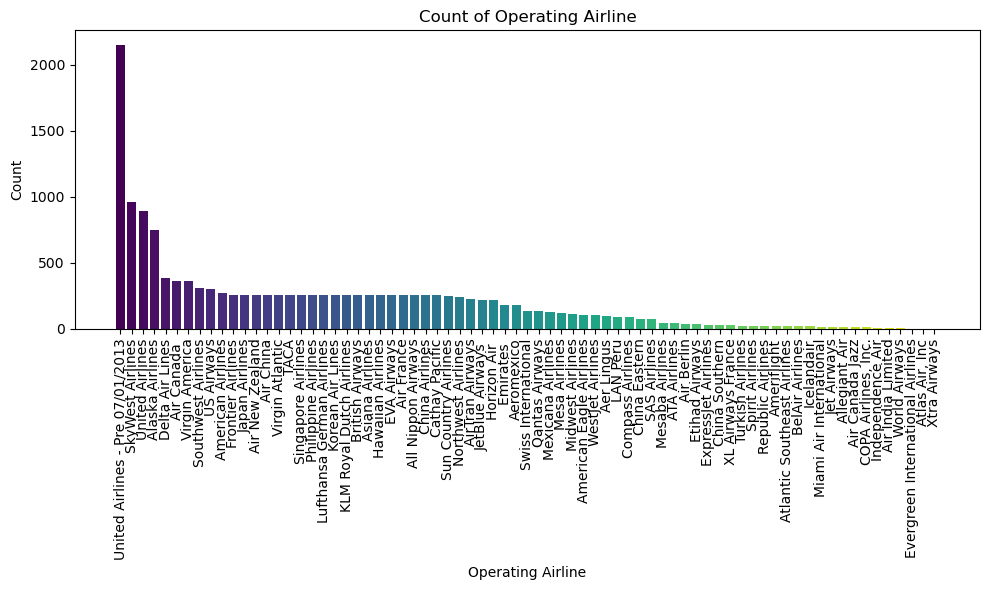

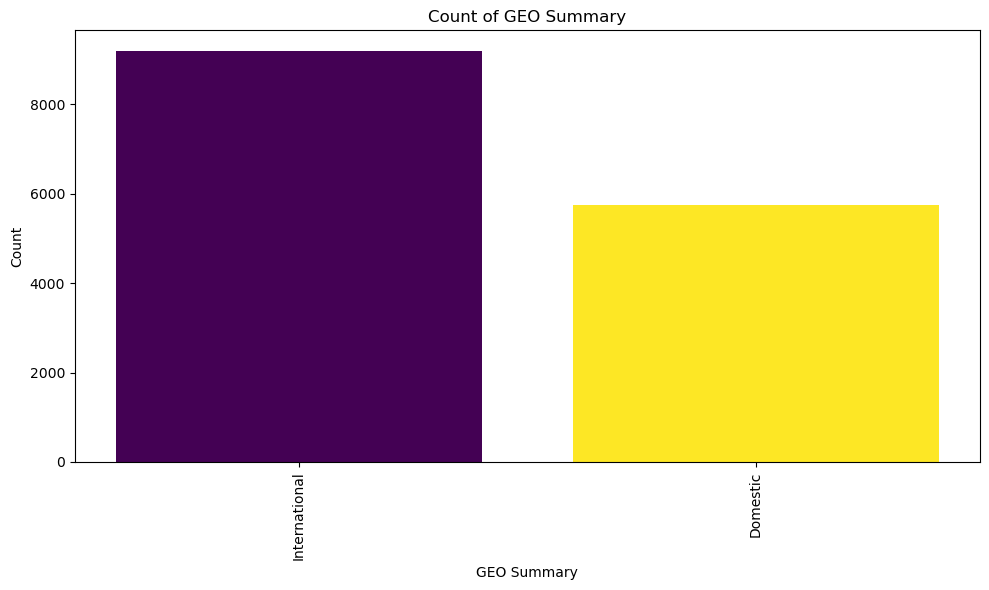

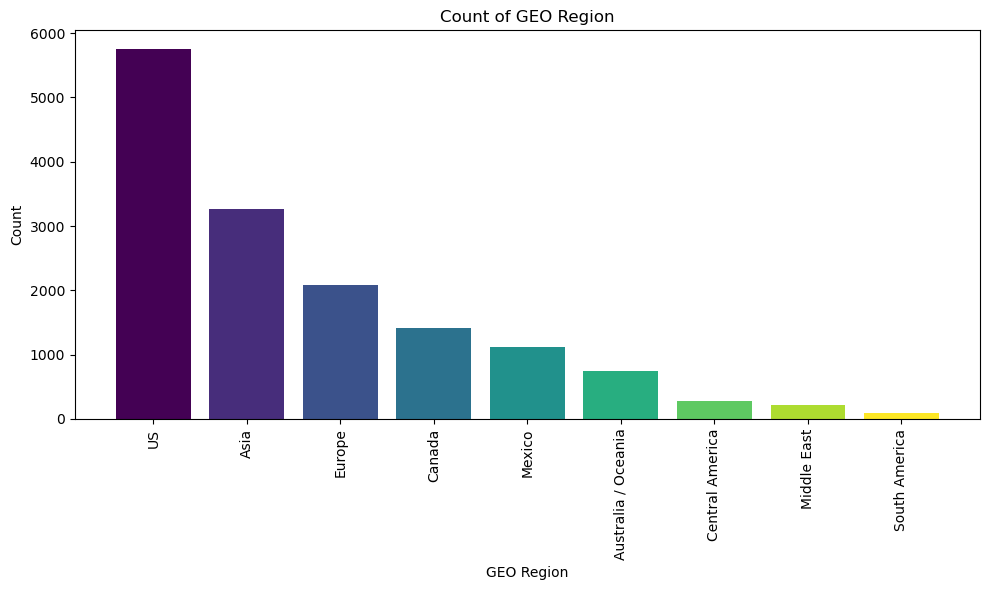

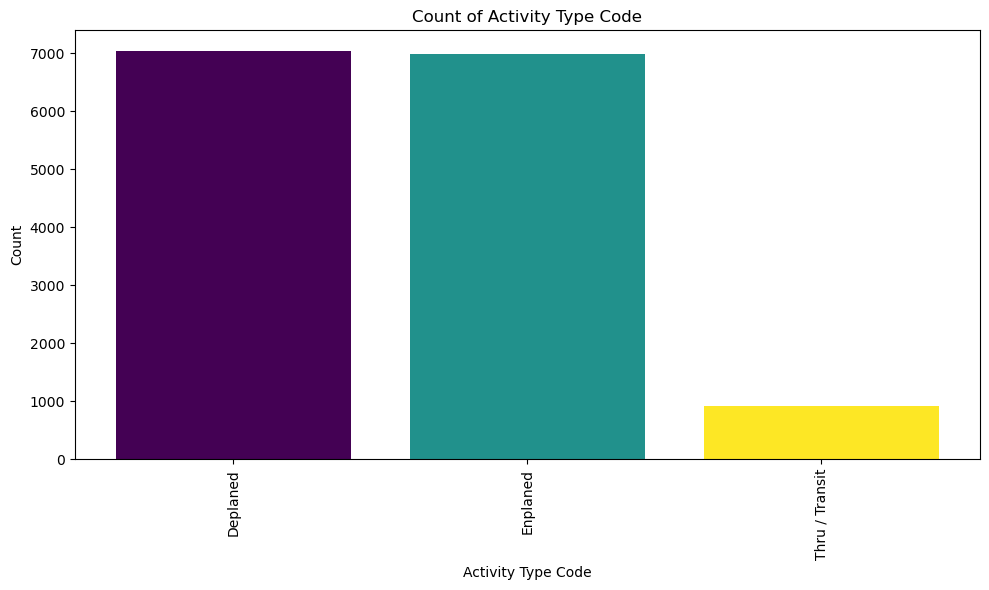

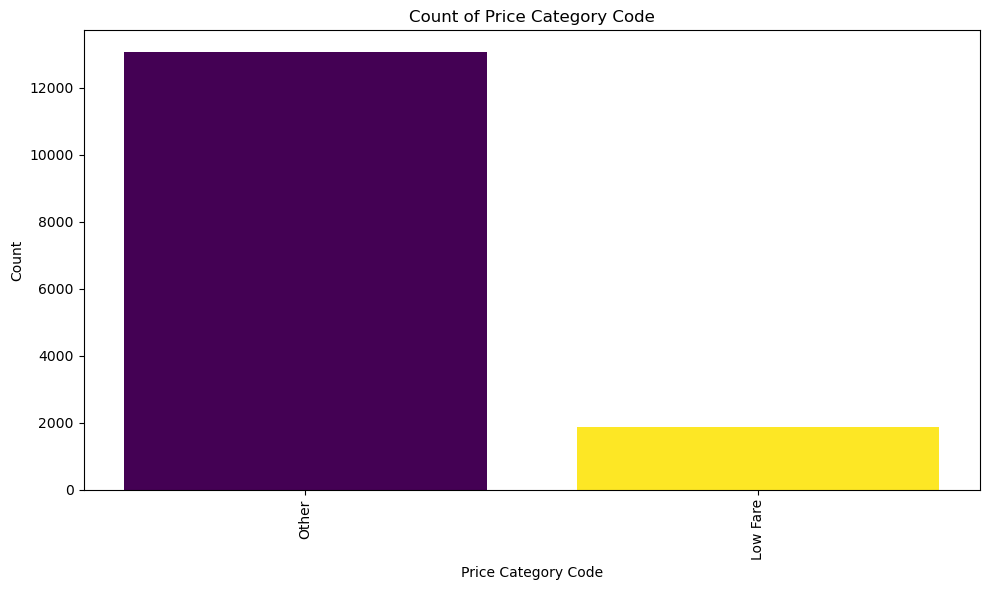

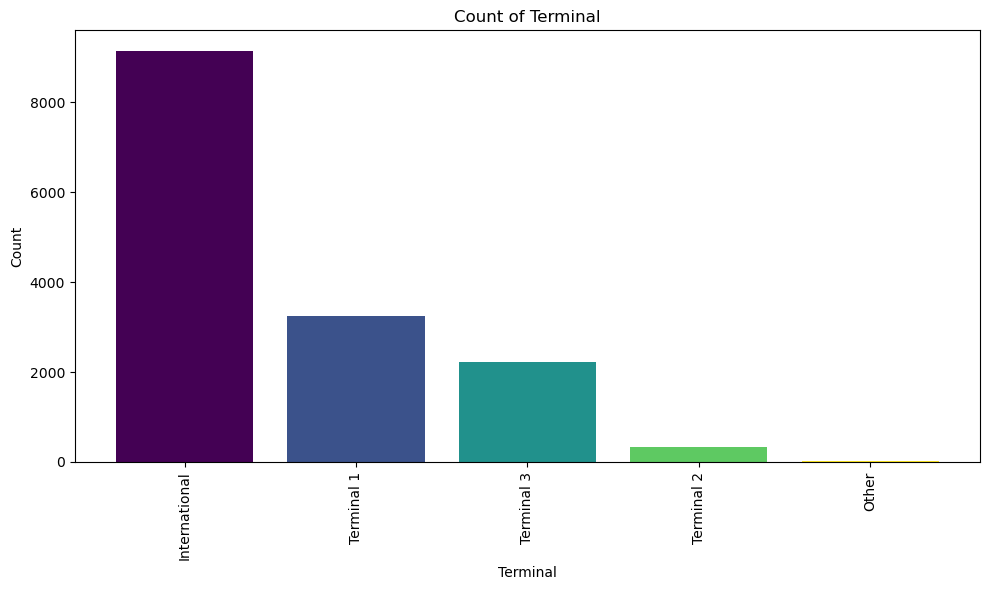

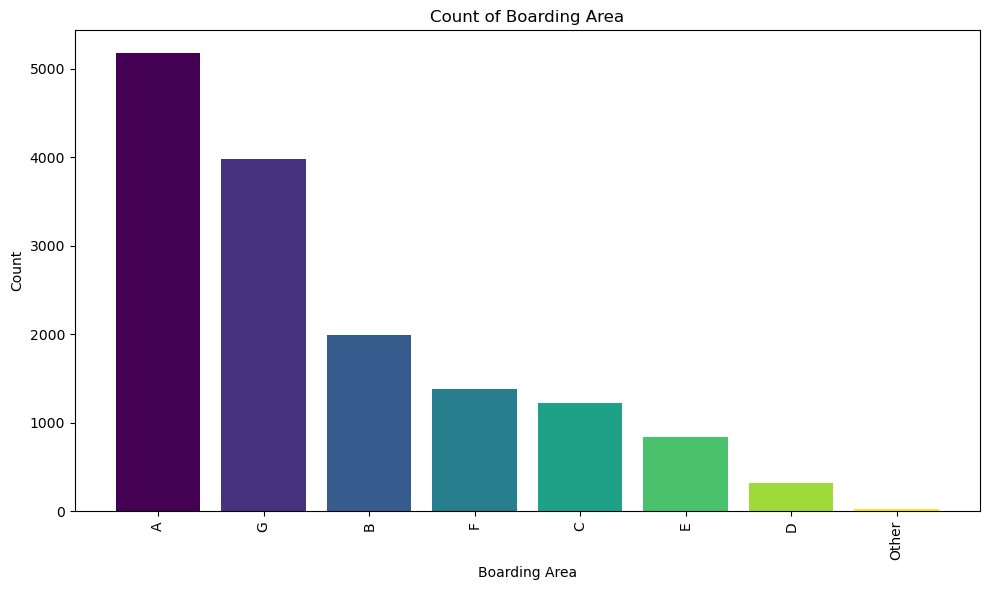

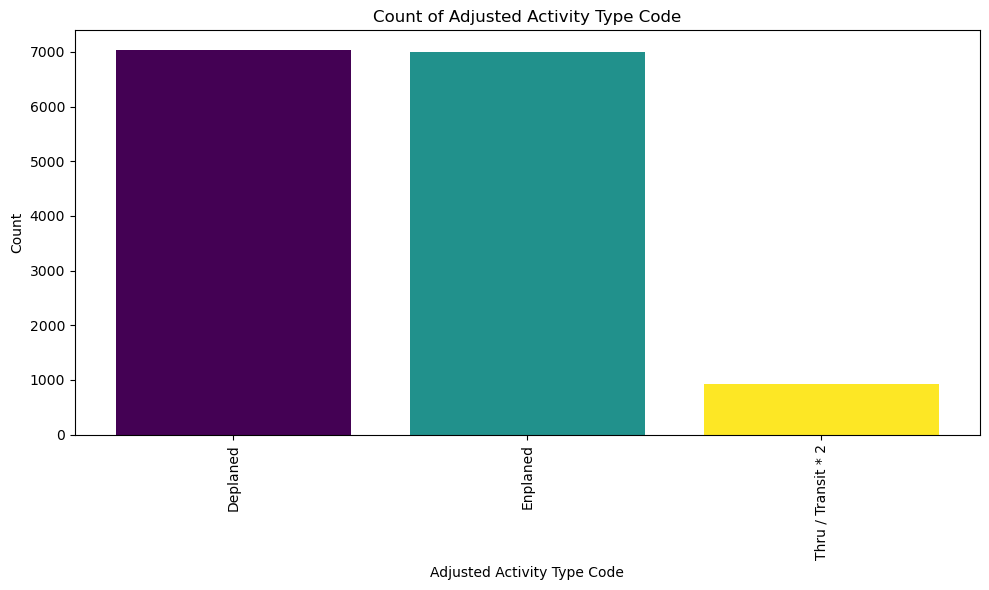

In [26]:
# Categorical columns for analysis
categorical_columns = ['Operating Airline', 'GEO Summary', 
                       'GEO Region', 'Activity Type Code', 
                       'Price Category Code', 
                       'Terminal', 'Boarding Area', 
                       'Adjusted Activity Type Code']

# Generating count plots for each categorical variable
for column in categorical_columns:
    counts = air_data[column].value_counts().reset_index()
    counts.columns = [column, 'count']
    
    plt.figure(figsize=(10, 6))
    plt.bar(counts[column], counts['count'], color=plt.cm.viridis(np.linspace(0, 1, len(counts))))
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

### Analysis of Categorical Columns

The categorical EDA offers insightful observations across various dimensions:

1. **'GEO Summary':** Highlighting a notable disparity, the dataset showcases a substantial count for 'International' activities, surpassing 9000, with 'Domestic' not far behind, hovering close to 6000. This disparity signifies a substantial presence of both international and domestic activities at the airport.
<br>
2. **'GEO Region':** Revealing a clear hierarchy, the count distribution across regions demonstrates the United States with the highest count, gradually tapering down across regions, eventually culminating at 'South America' with the least activity count.
<br>
3. **'Activity Type Code':** Notably, 'Deplaned' and 'Enplaned' exhibit nearly identical counts, each hovering around 7000. Conversely, 'Thru/Transit' records a notably lower count, lingering close to 1000, suggesting a lower prevalence of this activity type within the dataset.
<br>
4. **'Price Category Code':** Highlighting a distinct contrast, 'Other' significantly overshadows the count, exceeding 12,000, while 'Low Fare' registers a substantially lower count, nearly reaching 2000, indicating a disparity in pricing categories.
<br>
5. **'Terminal' and 'Boarding Area':** 'International' emerges as the dominant terminal with approximately 9000 counts, followed by a gradual decline across terminals and boarding areas, notably culminating in 'Other,' which exhibits remarkably lower counts.
<br>

6. **'Adjusted Activity Type Code':** Both 'Deplaned' and 'Enplaned' exhibit similar counts, each reaching around 7000, implying a balanced occurrence of these activities. In contrast, 'Thru/Transit *2' records a notably lower count, resting at almost 1000, signifying a comparatively rarer activity type within the dataset.

**Numeric Column - Adjusted Passenger Count**

In [27]:
air_data['Adjusted Passenger Count'].describe()

count    14953.000000
mean     16084.889922
std      15050.681867
min          1.000000
25%       5523.000000
50%       9418.000000
75%      21267.000000
max      44883.000000
Name: Adjusted Passenger Count, dtype: float64

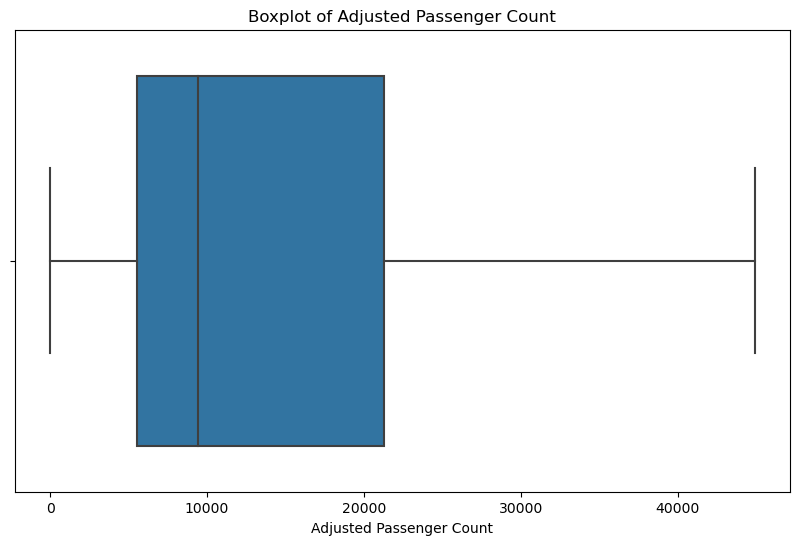

In [28]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10, 6))
sns.boxplot(x = air_data['Adjusted Passenger Count'])
plt.title('Boxplot of Adjusted Passenger Count')
plt.xlabel('Adjusted Passenger Count')
plt.show()

The 'Adjusted Passenger Count' column, a crucial numerical variable in our analysis, has undergone outlier treatment, resulting in the absence of outliers within this feature.

By employing a thoughtful outlier treatment strategy, I effectively mitigated the presence of extreme values that could potentially skew my analyses or distort the understanding of passenger traffic patterns at the airport. This step ensures a more robust and reliable dataset, fostering a clearer interpretation and more accurate modeling for subsequent analyses, such as clustering or trend identification.

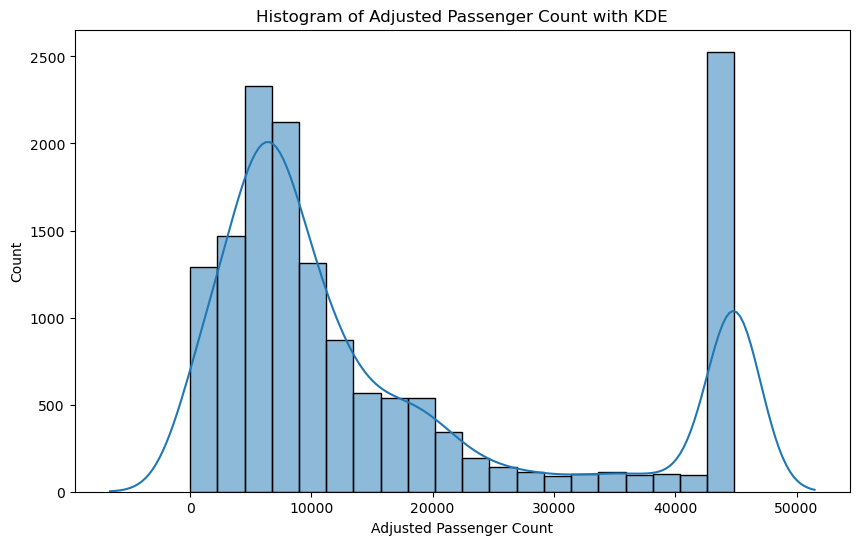

In [29]:
plt.figure(figsize = (10, 6))
sns.histplot(x = air_data['Adjusted Passenger Count'], bins = 20, kde = True, kde_kws = {'cut':3})
plt.title('Histogram of Adjusted Passenger Count with KDE')
plt.xlabel('Adjusted Passenger Count')
plt.show()

The above histogram and KDE plot suggests a binomial distribution, indicating the presence of two distinct peaks or bell curves within the data:

1. **Initial Bell Curve:** Centered around approximately 1000, this represents a peak in passenger counts, forming a bell curve that denotes a specific range or pattern of passenger activity within that count range.

2. **Second Bell Curve:** Positioned at a higher count, likely over 40000, this larger bell curve signifies another distinct cluster or range of passenger counts, potentially representing a different pattern or volume of passenger activity.

The presence of a bimodal distribution indicates that the 'Adjusted Passenger Count' dataset comprises two major modes or clusters of data points, each with its own central tendency and concentration of observations. This could imply the existence of different passenger traffic patterns or activity types within the dataset, contributing to the formation of distinct peaks in the histogram.

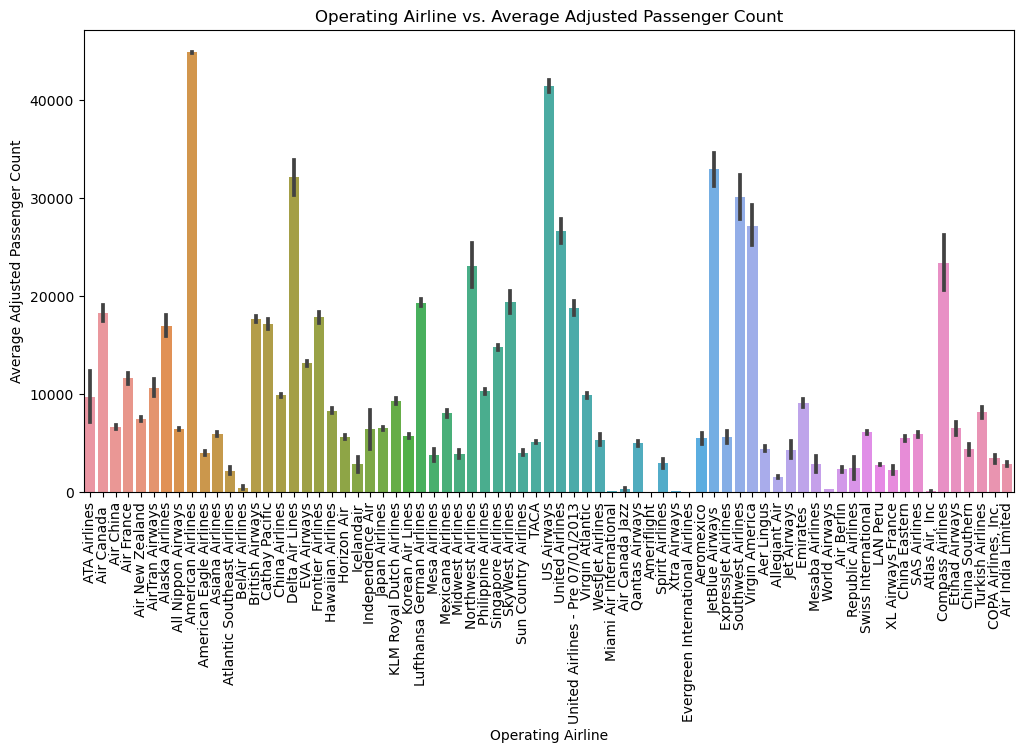

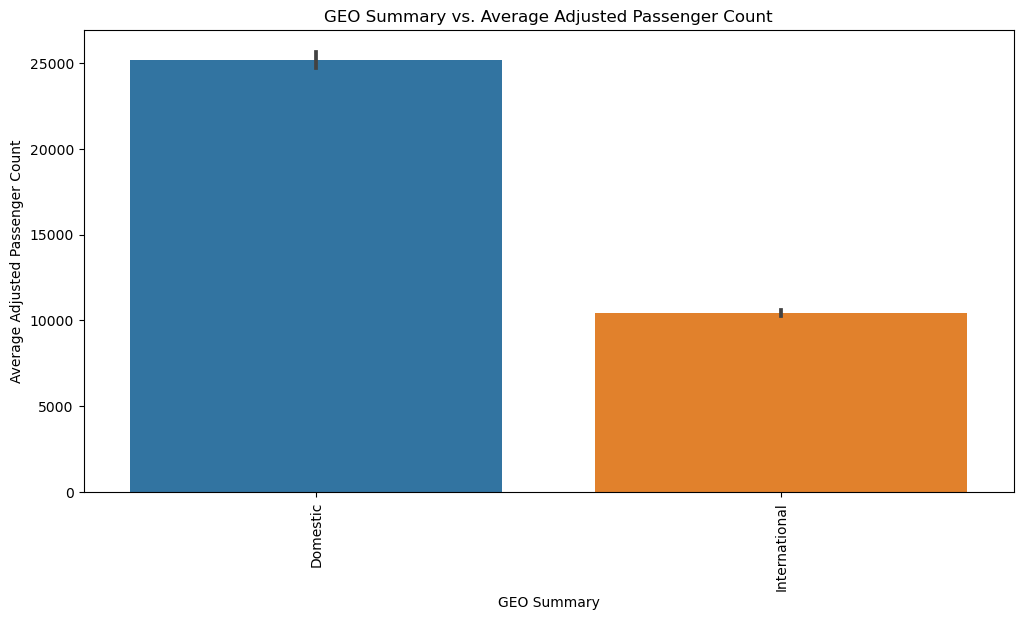

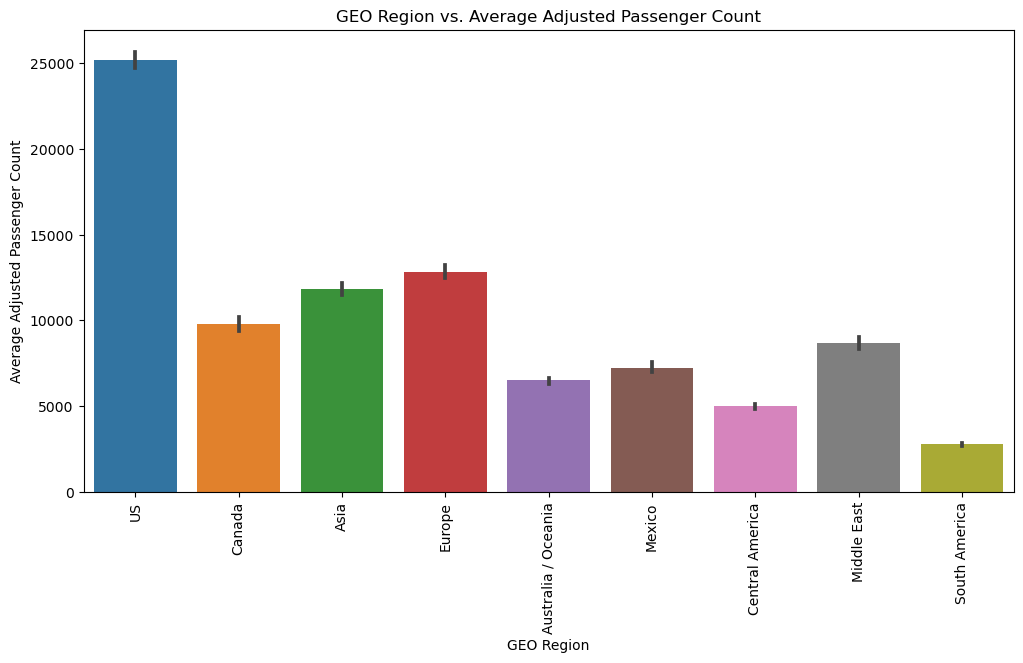

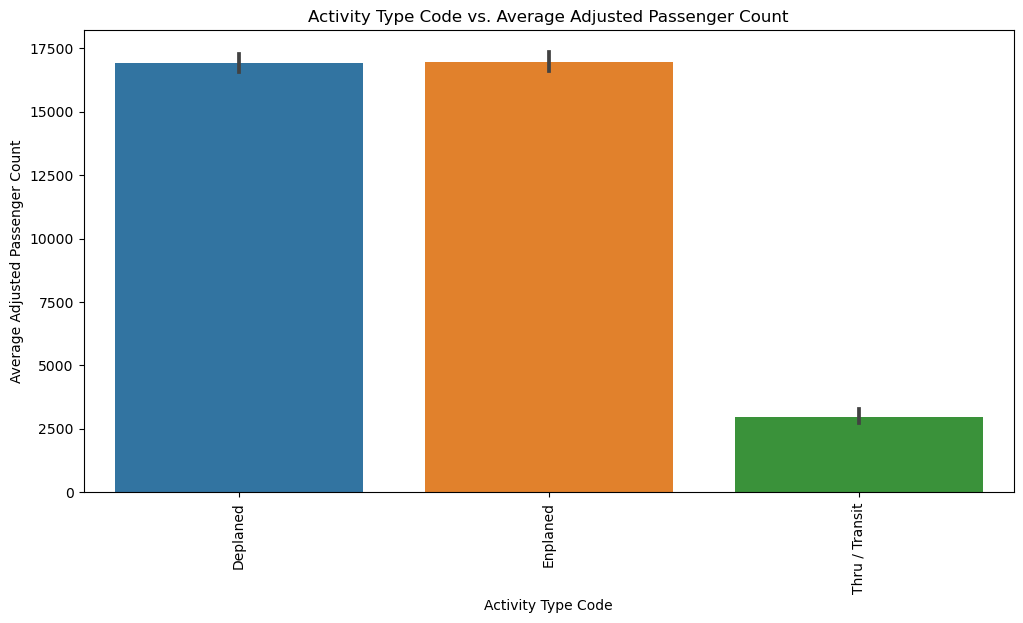

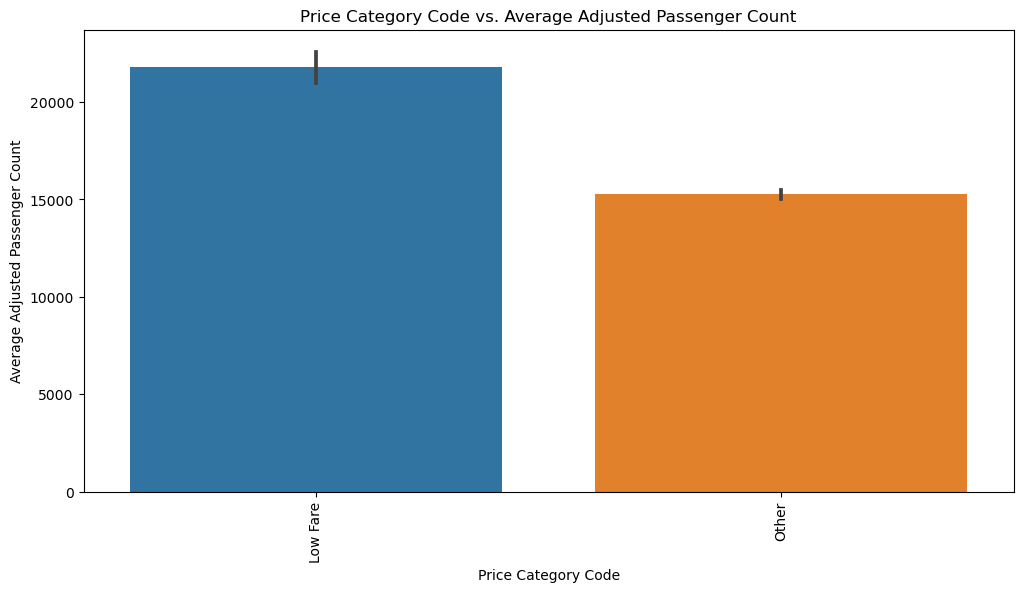

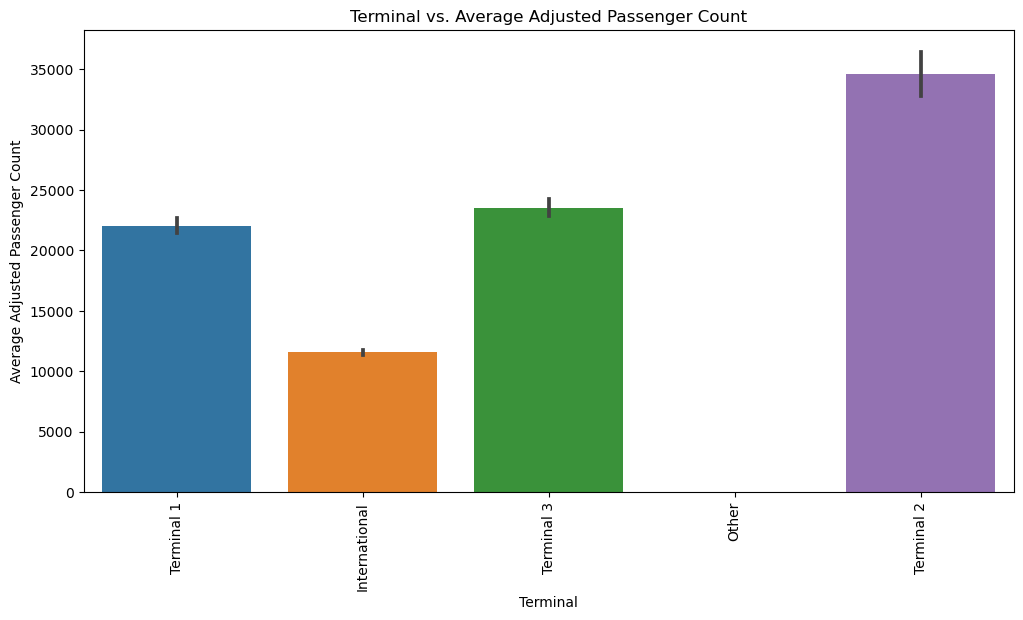

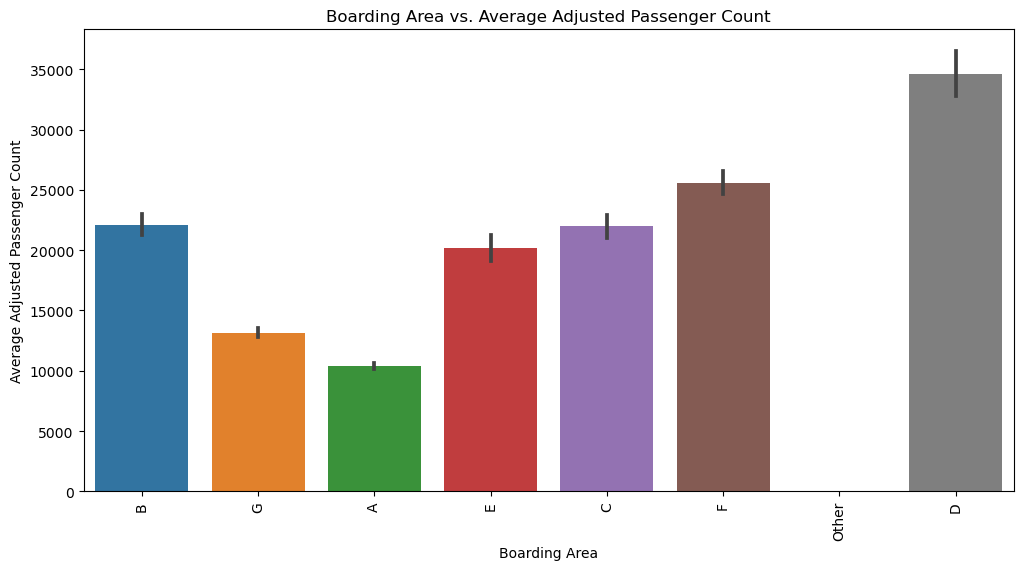

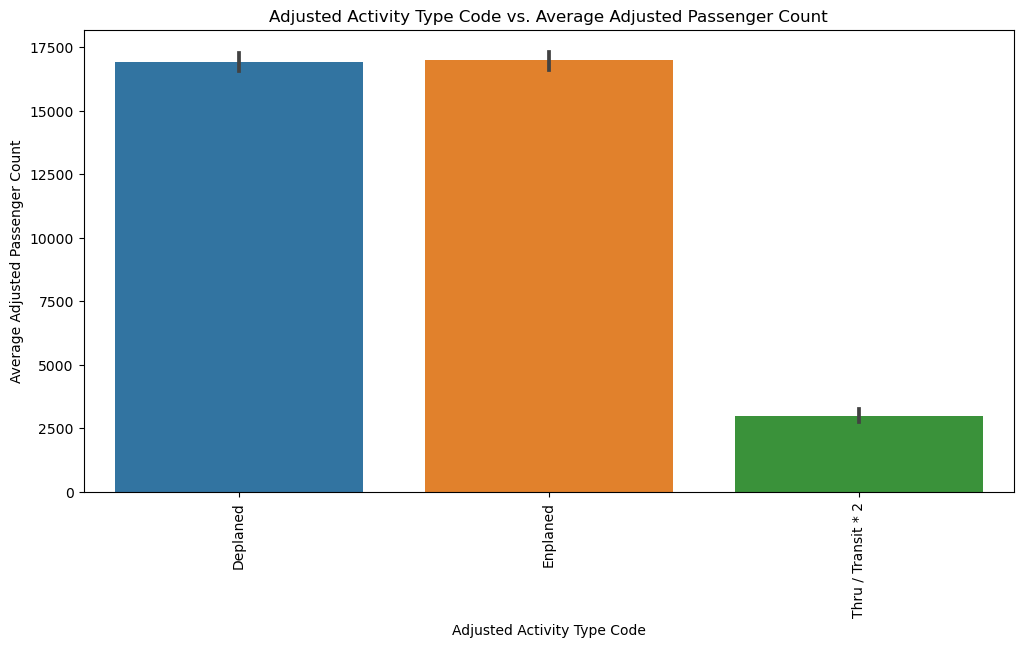

In [30]:
categorical_columns = ['Operating Airline', 'GEO Summary', 'GEO Region', 
                       'Activity Type Code', 'Price Category Code', 
                       'Terminal', 'Boarding Area', 
                       'Adjusted Activity Type Code']

for column in categorical_columns:
    plt.figure(figsize = (12, 6))
    sns.barplot(data = air_data, x = column, y = 'Adjusted Passenger Count', estimator = np.mean)
    plt.title(f'{column} vs. Average Adjusted Passenger Count')
    plt.xticks(rotation = 90)
    plt.ylabel('Average Adjusted Passenger Count')
    plt.show()

In the multivariate analysis above, a series of barplots was created to explore the relationship between various categorical variables and the 'Average Adjusted Passenger Count'. The code iterated through a list of categorical columns, including 'Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', and 'Adjusted Activity Type Code'.

For each categorical column in the list, a barplot was created which showcased the average 'Adjusted Passenger Count' across different categories within the selected categorical variable. The `estimator = np.mean` parameter calculated and displayed the average value of the 'Adjusted Passenger Count' within each category.

In [31]:
# I'll drop the 'Activity Type Code' column and keep the 'Adjusted Activity Type Code' column
air_data.drop('Activity Type Code', axis = 1, inplace = True)

In [32]:
air_data['GEO Region'].value_counts()

GEO Region
US                     5757
Asia                   3272
Europe                 2078
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         272
Middle East             214
South America            90
Name: count, dtype: int64

# 3. Data Modeling

## 3.1 Encoding Categorical Data

In [33]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame to maintain the original and work on the copy
encoded_air_data = air_data.copy()

# Label encode 'Operating Airline'
label_encoder = LabelEncoder()
encoded_air_data['Operating Airline'] = label_encoder.fit_transform(encoded_air_data['Operating Airline'])
encoded_air_data['Operating Airline IATA Code'] = label_encoder.fit_transform(encoded_air_data['Operating Airline IATA Code'].astype(str))


# One-hot encode other categorical columns
nominal_columns = ['GEO Summary', 'Price Category Code', 
                   'GEO Region', 'Adjusted Activity Type Code', 
                   'Boarding Area', 'Terminal',
                   'Published Airline', 'Published Airline IATA Code']

encoded_air_data = pd.get_dummies(encoded_air_data, columns = nominal_columns, drop_first = True, dtype = int)

### Label Encoding:

1. **Operating Airline and Operating Airline IATA Code:**
    - Hierarchical Relationship: Some airline names and IATA codes may have an inherent order or hierarchical relationship based on their significance or establishment dates, making label encoding a suitable choice.
    
### One-Hot Encoding:

1. **GEO Summary and Price Category Code:**
    - Nominal Data: Both columns contain categorical data without inherent order, making one-hot encoding ideal to create binary columns for each category.
<br>

2. **GEO Region, Adjusted Activity Type Code, Boarding Area, Terminal, Published Airline, Published Airline IATA Code:**
    - Nominal Data with Multiple Categories: These columns have multiple categories without a hierarchy, hence one-hot encoding creates separate binary columns for each category, preserving the distinction among categories.

## 3.2 K-Means Clustering Model

### Prinicpal Component Analysis + Feature Scaling

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_without_date = encoded_air_data.drop('Date', axis = 1)  # Excluding the 'Date' column

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_date)  # Standardize the data

pca = PCA(n_components = 4)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result back to DataFrame if necessary
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)])

In [35]:
pca_df

PC1       PC2       PC3        PC4
0      3.522602  1.253737 -0.404573  -0.566021
1      3.548773  1.324702 -0.415590  -0.497023
2      3.356416  0.833313 -0.287204  -0.931841
3     -0.200003  1.899191 -0.088181   0.334419
4     -0.211257  1.989153 -0.098375   0.384093
...         ...       ...       ...        ...
14948  3.972600 -1.084564 -0.131572  10.014134
14949  0.573251 -0.678767 -0.290769   4.255523
14950  1.676938 -0.602123 -0.293359   9.991905
14951 -1.863093 -0.505379 -0.338408  -0.716412
14952 -1.878811 -0.413152 -0.348504  -0.669042

[14953 rows x 4 columns]

### Using the Elbow Method to find the optimal number of clusters

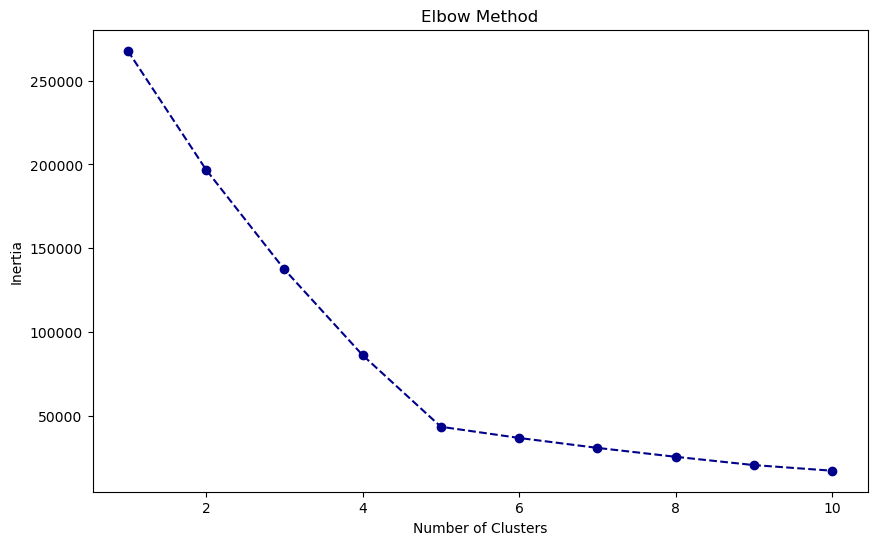

In [36]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker= 'o', linestyle='--', color = 'darkblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the above, it seems that the optimal number of clusters in 5. Let's implement this in our KMeans model

In [37]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(pca_df)

# Adding the clusters back to the encoded DataFrame
encoded_air_data['Cluster'] = clusters

In [38]:
encoded_air_data['Cluster'].value_counts()

Cluster
0    6791
2    3744
1    3628
4     764
3      26
Name: count, dtype: int64

### Visualizing the clusters in the PCA-reduced space with 4 components

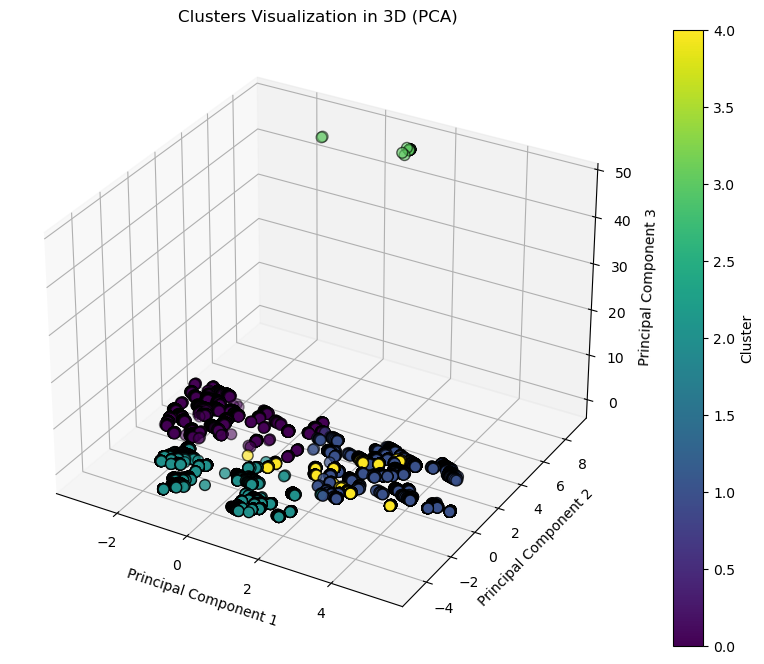

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

scatter = ax.scatter(
    pca_df.iloc[:, 0], 
    pca_df.iloc[:, 1],
    pca_df.iloc[:, 2],
    c = clusters, cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 60
)

# Customize plot labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clusters Visualization in 3D (PCA)')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()

## 3.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

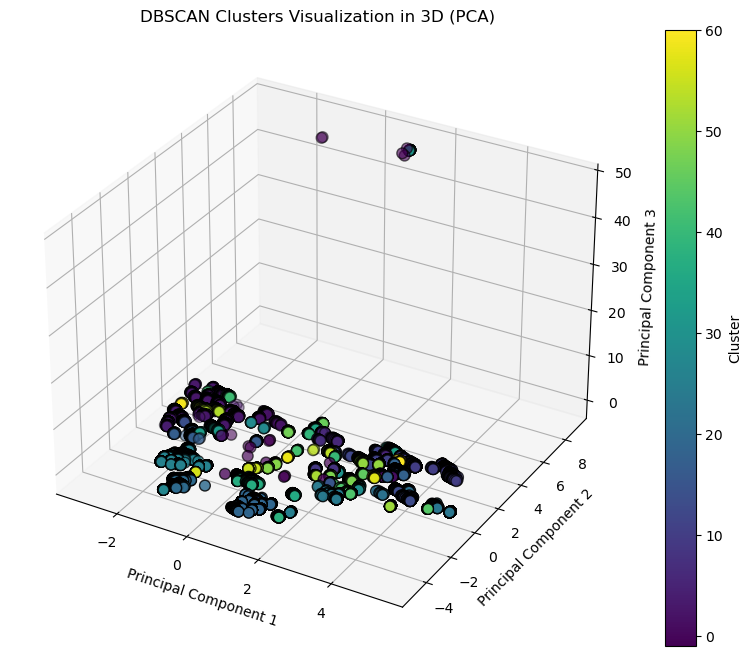

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 5)

# Fit the DBSCAN model to the PCA-transformed data
dbscan.fit(pca_df)

# Get cluster labels
db_clusters = dbscan.labels_

# Visualize DBSCAN clusters
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(
    pca_df.iloc[:, 0],
    pca_df.iloc[:, 1],
    pca_df.iloc[:, 2],
    c = db_clusters,
    cmap = 'viridis',
    marker = 'o',
    edgecolor = 'k',
    s = 60
)

# Customize plot labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clusters Visualization in 3D (PCA)')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()

### Adjusting DBSCAN Hyperparameters

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import calinski_harabasz_score, make_scorer

calinski_scorer = make_scorer(calinski_harabasz_score)

dbscan = DBSCAN()

param_grid = {
    'eps': [0.1, 0.3, 0.5, 0.7, 1.0], 
    'min_samples': [2, 3, 5, 7, 10]
}


grid_search = GridSearchCV(dbscan, param_grid, scoring = calinski_scorer, verbose = 1)
grid_search.fit(pca_df)

best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']

print(f"Best Epsilon: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Epsilon: 0.1
Best Min Samples: 2


The Calinski-Harabasz Index was chosen as the scoring metric for hyperparameter tuning due to its capability to evaluate the compactness and separation of clusters. This metric assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher Calinski-Harabasz scores typically indicate well-defined, dense, and separated clusters. 

By maximizing this index during the hyperparameter search, the aim is to identify parameter settings that result in more cohesive and distinct clusters, aligning with the inherent nature of DBSCAN's density-based clustering approach.

In [42]:
# Fitting DBSCAN with best Hyperparameters
dbscan = DBSCAN(eps=0.1, min_samples=2)

dbscan.fit(pca_df)

db_clusters = dbscan.labels_
db_clusters

array([  0,   1,   2, ..., 212, 106, 107], dtype=int64)

### Visualizing DBSCAN Clusters

In [43]:
### Visualizing DBSCAN Clusters in 2D

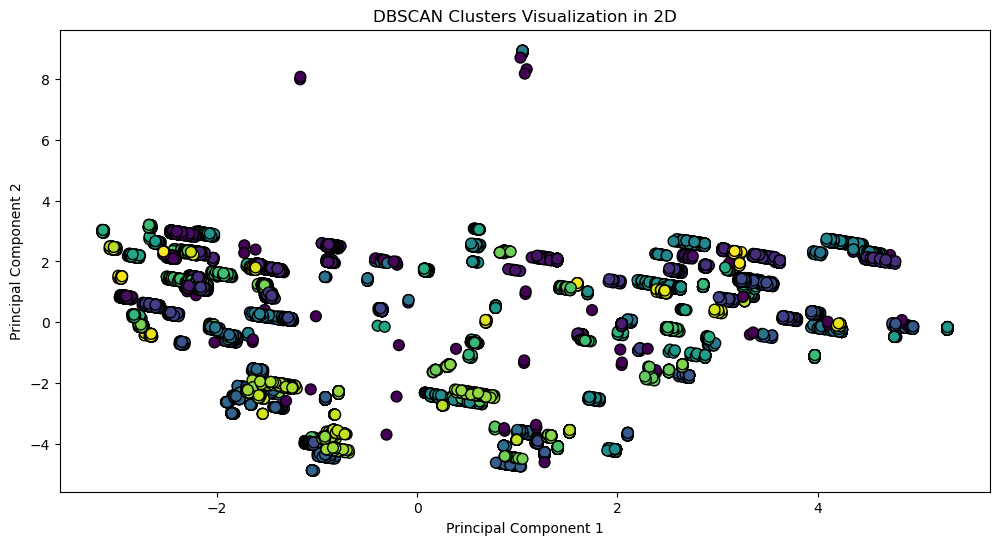

In [44]:
plt.figure(figsize = (12,6))
plt.scatter(
    pca_df.iloc[:, 0],  # First PCA component
    pca_df.iloc[:, 1],  # Second PCA component
    c=db_clusters,
    cmap='viridis',
    marker='o',
    edgecolor='k',
    s=60)

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clusters Visualization in 2D')

plt.show()

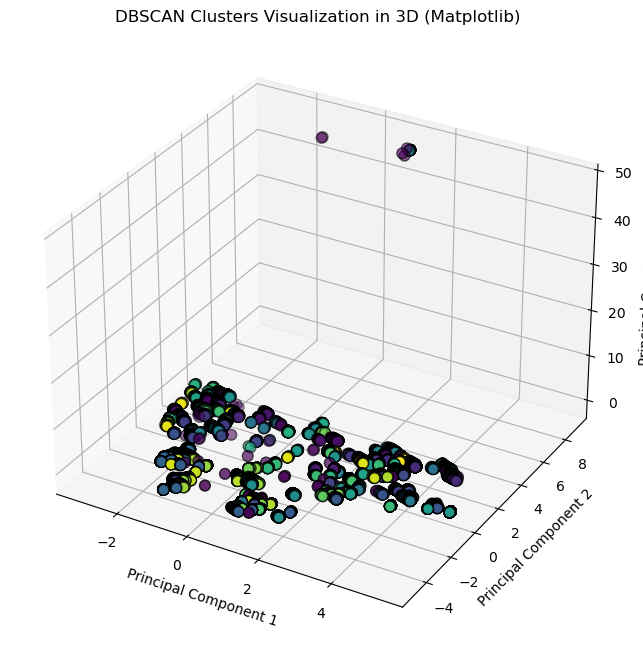

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the clusters
scatter = ax.scatter(
    pca_df.iloc[:, 0],
    pca_df.iloc[:, 1],
    pca_df.iloc[:, 2],
    c=db_clusters,
    cmap='viridis',
    marker='o',
    edgecolor='k',
    s=60
)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clusters Visualization in 3D (Matplotlib)')


plt.show()

## 3.4 Evaluation of Clustering Algorithms: K-Means vs. DBSCAN

Upon assessing the clustering performance between K-Means and DBSCAN on our dataset, it becomes evident that K-Means showcases superior performance for this particular data.

#### Reasons for K-Means' Superiority:

- **Data Structure:** K-Means is advantageous for datasets with well-defined spherical-shaped clusters and similar cluster sizes. If the underlying data conforms to these characteristics, K-Means tends to perform more effectively.
<br>

- **Assumption on Cluster Shapes:** K-Means assumes clusters as spherical and of equal variance, aligning better with the dataset's characteristics. DBSCAN, on the other hand, relies on density and is sensitive to density variations, which might not match the inherent structure of the data.

#### Dataset Characteristics:

- **Homogeneity in Cluster Distribution:** K-Means thrives when clusters are of relatively similar density and size, and the data conforms to this criterion.
<br>

- **Limitations of DBSCAN:** DBSCAN's performance might vary when dealing with clusters of irregular shapes or varying densities, leading to difficulties in identifying clusters accurately.

#### Conclusion:
Considering the dataset's characteristics and the performance metrics, K-Means demonstrates superior clustering results compared to DBSCAN. Its ability to handle spherical clusters with similar variances and sizes aligns more effectively with the underlying data structure, resulting in better-defined and separated clusters.